1 10
1 12
{'initial_point': [[1.2310672582, 1.5706881168]], 'maxeval': [4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 100], 'initial_step': [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2], 'xtol_abs': [1e-10], 'executor_kwargs': [{'shots': None}]}
2 10
2 12
{'initial_point': [[0.9754194654, 1.7959753912, 2.2202413604, 1.1700312592]], 'maxeval': [6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 100], 'initial_step': [0.01, 0.02526315789473684, 0.04052631578947368, 0.05578947368421053, 0.07105263157894737, 0.0863157894736842, 0.10157894736842105, 0.11684210526315789, 0.13210526315789473, 0.1473684210526316, 0.16263157894736843, 0.17789473684210527, 0.1931578947368421, 0.20842105263157895, 0.2236842105263158, 0.23894736842105263, 0.25421052631578944, 0.2694736842105263, 0.2847368421052632, 0.3], 'xtol_abs': [1e-10], 'executor_kwargs': [{'shots'

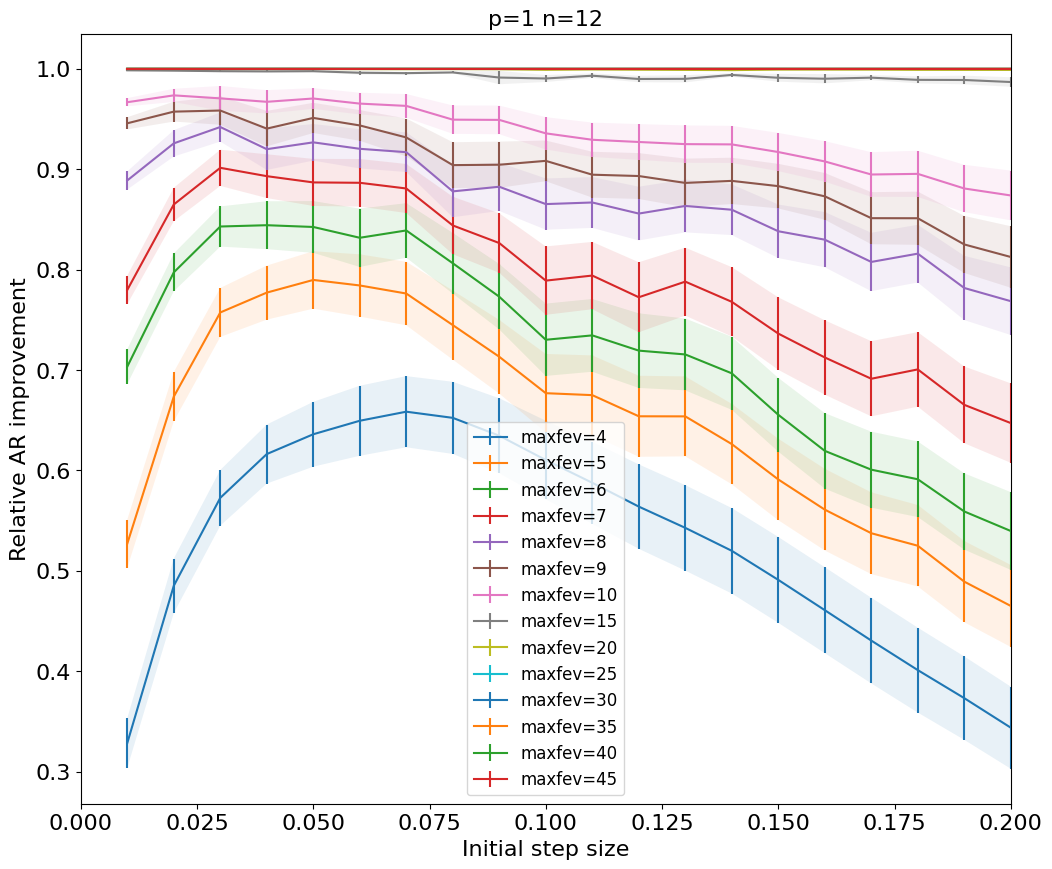

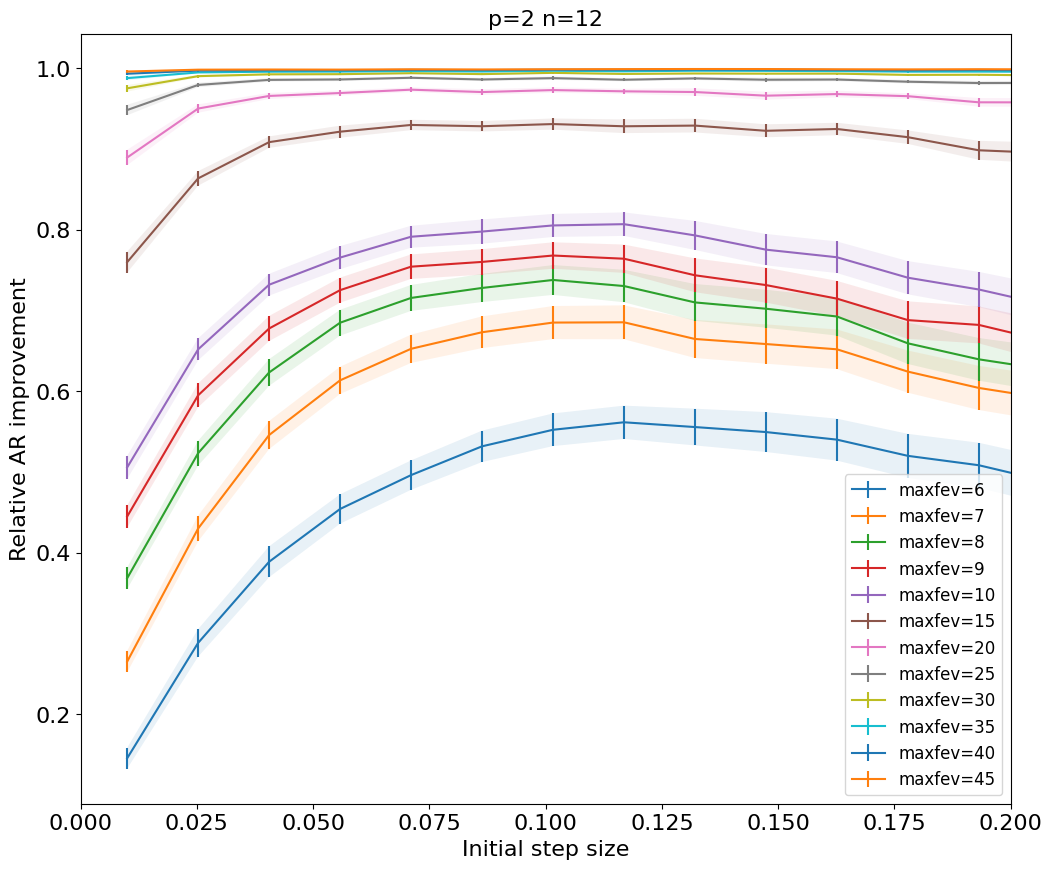

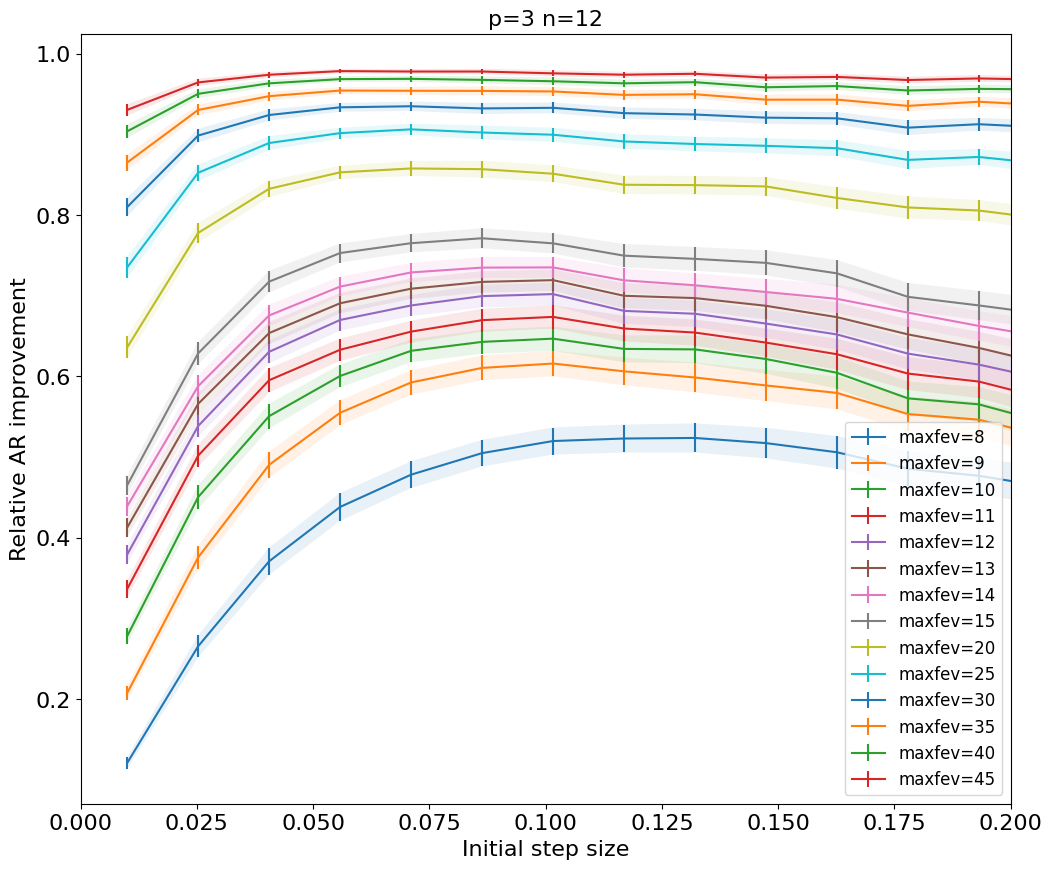

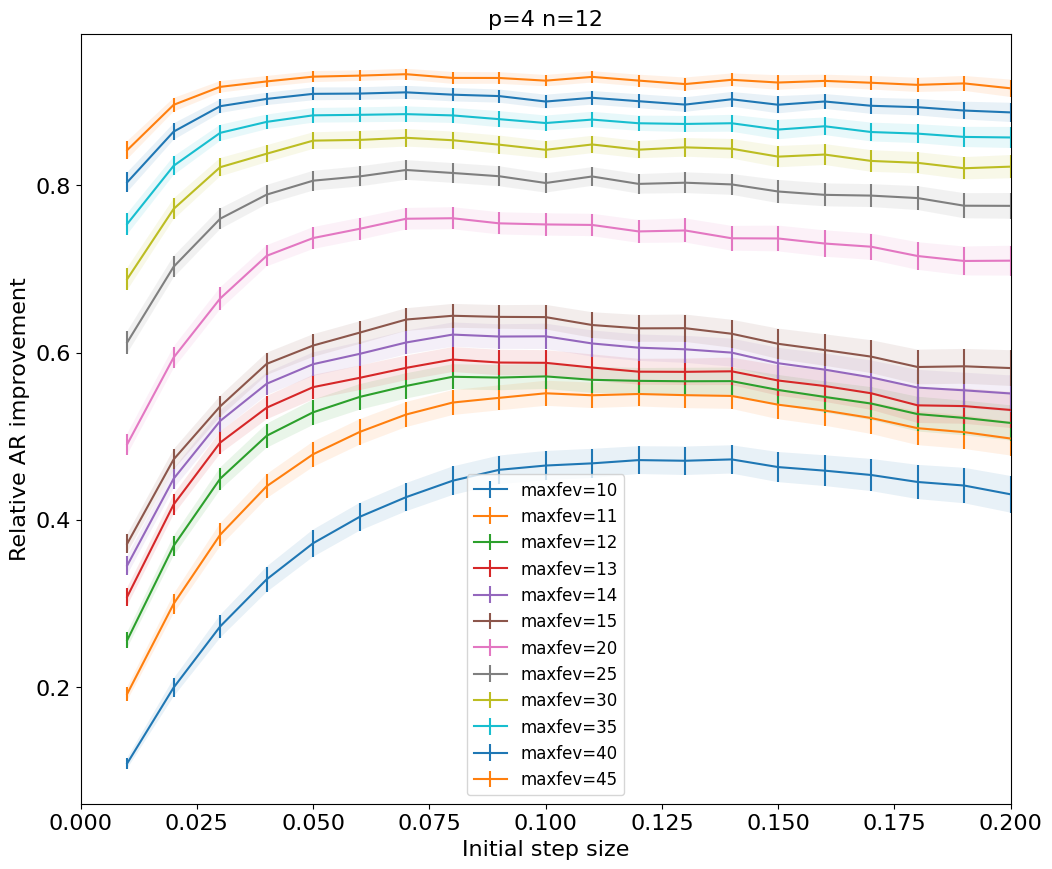

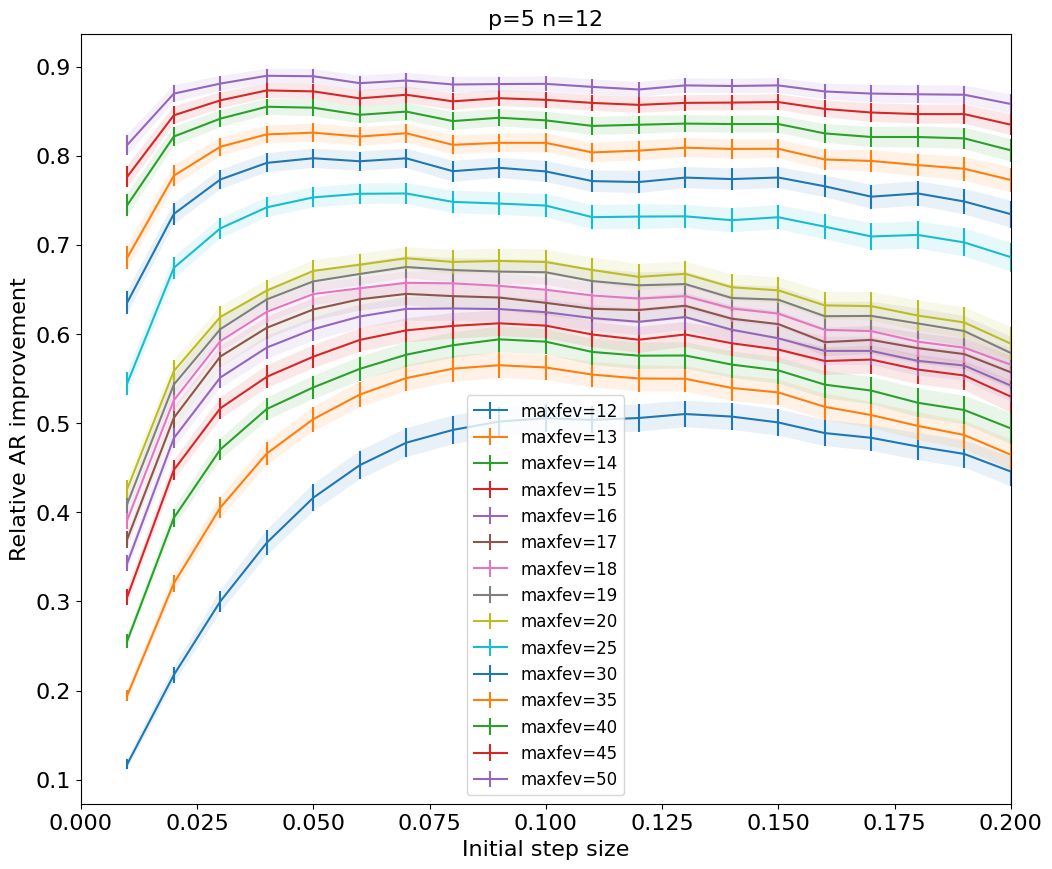

In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

method = "LN_COBYLA (NLopt)"
problem = "maxcut"
depth_pool = [1, 2, 3, 4, 5]
qubit_pool = list(range(10, 13, 2))
n = 12
seed_pool = list(range(100))
fontsize = 16

for p in depth_pool:
    result, initial_ar, max_ar = [], [], []
    for i, n in enumerate(qubit_pool):
        # data = pickle.load(
        #     open(
        #         f"data/{problem}/configs/max_ar/{method}-p{p}-q{n}-s0-999.pckl",
        #         "rb",
        #     ),
        # )
        # max_ar.append(data["result"][:len(seed_pool)])

        data = pickle.load(
            open(
                f"data/{problem}/configs/rhobeg/{method}-p{p}-q{n}-s{seed_pool[0]}-{seed_pool[-1]}.pckl",
                "rb",
            ),
        )
        config = data["config"]
        maxfev_pool = config["maxeval"]
        rhobeg_pool = config["initial_step"]
        print(p, n)
        result.append(data["result"])
        initial_ar.append(data["initial_ar"])
    result = np.array(result)
    initial_ar = np.array(initial_ar)[:,:,np.newaxis,np.newaxis]
    # max_ar = np.array(max_ar)[:,:,np.newaxis,np.newaxis]
    max_ar = result[:,:,-1,0][:,:,np.newaxis,np.newaxis]
    result = (result - initial_ar) / (max_ar - initial_ar)
    print(config)

    # plt.figure(figsize=(12, 4))
    # bar_width = 0.3
    # colors = ["tab:blue", "tab:orange", "pink", "lightblue", "lightgreen", "violet"]
    # for j, (maxfev, c) in enumerate(zip(maxfev_pool, colors)):
    #     ys = np.array(rhobeg_pool)[np.argmax(result[:,:,j], axis=2)]
    #     print(np.median(ys[0]), np.mean(ys[0]))
    #     plt.violinplot(
    #         ys.T,
    #         # sym="+",
    #         positions=np.array(qubit_pool)+bar_width*j,
    #         widths=bar_width,
    #         showmeans=True,
    #         # showmedians=True,
    #     )
    #     plt.plot([], c=c, label=f"{maxfev=}")
    # plt.xticks(np.array(qubit_pool) + bar_width * (len(maxfev_pool)-1) / 2, labels=qubit_pool)
    # plt.ylabel("rhobeg")
    # plt.title(f"{p=}")
    # plt.legend()

    plt.figure(figsize=(12, 10))
    for j, maxfev in enumerate(maxfev_pool[:-1]):
        ys = result[:,:,j]
        y = np.mean(ys, axis=(0, 1))
        std_err = np.std(ys, axis=(0, 1)) / np.sqrt(len(seed_pool))
        plt.errorbar(rhobeg_pool, y, yerr=std_err, label=f"{maxfev=}")
        plt.fill_between(rhobeg_pool, y - std_err, y + std_err, alpha=0.1)

    plt.xlim((0, 0.2))
    plt.ylabel("Relative AR improvement", fontsize=fontsize)
    plt.xlabel("Initial step size", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(f"{p=} {n=}", fontsize=fontsize)
    plt.legend(fontsize=fontsize-4)
    plt.savefig(f"figs/{problem}/rhobeg/{method}-p{p}-q{n}.png")
